<a href="https://colab.research.google.com/github/ChihabEddine98/DL_course/blob/main/lec1_reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import reuters
from sklearn.model_selection import train_test_split


In [2]:
# data load
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


2121728/2110848 [==============================] - 0s 0us/step


In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i in range (len (sequences)):
        for j in range (len (sequences [i])):
            results [i] [sequences [i] [j]] = 1.
    return results


In [12]:
from tensorflow.keras.utils import to_categorical
# Data Prepro
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [13]:
# Validation set Split
print(x_train.shape)
x_train,x_val ,y_train, y_val = train_test_split(x_train,y_train,test_size = 0.3)
print(x_train.shape)

(8982, 10000)
(6287, 10000)


In [14]:
# Model Settings
model = keras.Sequential(keras.layers.Dense(64,activation = 'relu' , input_shape = (x_train.shape[1],)))
model.add(keras.layers.Dense(64,activation = 'relu'))
model.add(keras.layers.Dense(46,activation = 'softmax'))


model.compile(loss = 'categorical_crossentropy' , optimizer = 'rmsprop' , metrics=['acc'])



In [15]:
# Train the model

def train(model):
    with tf.device('/device:GPU:0'):
       history = model.fit(x_train,y_train,
                        epochs = 20,
                        batch_size = 512,
                        validation_data = (x_val,y_val)
                        )
    return history

In [16]:
# Train the model 
history_1 = train(model)

Epoch 1/20
13/13 [==============================] - 3s 46ms/step - loss: 2.7862 - acc: 0.4800 - val_loss: 1.9542 - val_acc: 0.6007
Epoch 2/20
13/13 [==============================] - 0s 21ms/step - loss: 1.5074 - acc: 0.6911 - val_loss: 1.5016 - val_acc: 0.6798
Epoch 3/20
13/13 [==============================] - 0s 19ms/step - loss: 1.1199 - acc: 0.7620 - val_loss: 1.3278 - val_acc: 0.7087
Epoch 4/20
13/13 [==============================] - 0s 21ms/step - loss: 0.8818 - acc: 0.8160 - val_loss: 1.2311 - val_acc: 0.7351
Epoch 5/20
13/13 [==============================] - 0s 20ms/step - loss: 0.7029 - acc: 0.8576 - val_loss: 1.1583 - val_acc: 0.7570
Epoch 6/20
13/13 [==============================] - 0s 19ms/step - loss: 0.5605 - acc: 0.8880 - val_loss: 1.1397 - val_acc: 0.7447
Epoch 7/20
13/13 [==============================] - 0s 27ms/step - loss: 0.4493 - acc: 0.9093 - val_loss: 1.0445 - val_acc: 0.7848
Epoch 8/20
13/13 [==============================] - 0s 21ms/step - loss: 0.3613 - a

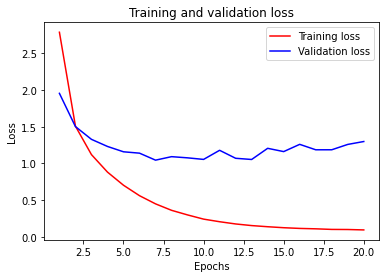

In [17]:
import matplotlib.pyplot as plt


history_dict = history_1.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()